In [3]:
import sklearn

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
dataset = pd.read_csv('C:/Users/thipp/Untitled Folder/Cancer_1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,c_size,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d491,d492,d493,d494,d495,d496,d497,d498,d499,d500
0,1,-9.089977,-9.033755,-8.980541,-8.930250,-8.882794,-8.838088,-8.796046,-8.756586,-8.719629,...,-8.965822,-8.917415,-8.866420,-8.812779,-8.756433,-8.697321,-8.635379,-8.570539,-8.502730,-8.431879
1,2,-7.349474,-7.273892,-7.209961,-7.159021,-7.122465,-7.101608,-7.097471,-7.110481,-7.140100,...,-9.490124,-9.487686,-9.481552,-9.471356,-9.456710,-9.437205,-9.412410,-9.381877,-9.345142,-9.301729
2,3,-9.502599,-9.441747,-9.383203,-9.326875,-9.272667,-9.220474,-9.170184,-9.121662,-9.074743,...,-9.669580,-9.607876,-9.540015,-9.465946,-9.385645,-9.299118,-9.206404,-9.107574,-9.002730,-8.892005
3,4,-8.060942,-8.040655,-8.034525,-8.045360,-8.076387,-8.130881,-8.211267,-8.317360,-8.443639,...,-9.026234,-9.005298,-8.983102,-8.959635,-8.934885,-8.908843,-8.881498,-8.852838,-8.822853,-8.791531
4,5,-9.267754,-9.222859,-9.180618,-9.140969,-9.103817,-9.069050,-9.036552,-9.006204,-8.977893,...,-9.498355,-9.468099,-9.433271,-9.393693,-9.349195,-9.299615,-9.244801,-9.184619,-9.118946,-9.047681


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score : ", r_score)
score = regressor.score(X_train, y_train)
print("Training Score : ", score)

Testing Score :  0.9988666703538607
Training Score :  1.0


In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

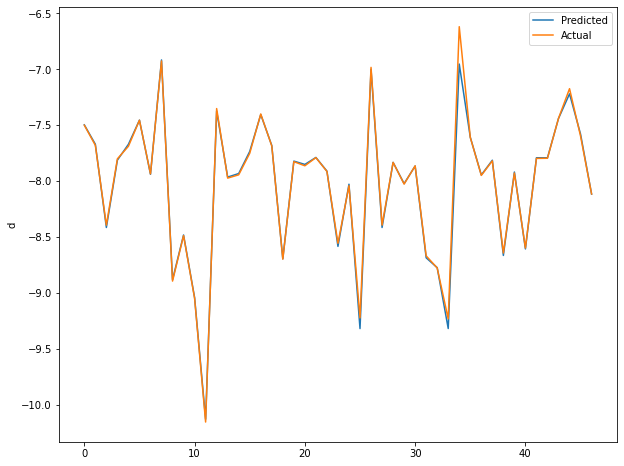

In [14]:
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.ylabel("d")
    plt.legend()
    plt.show()


In [14]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.8, max_iter=10000)
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score : ", r_score)
score = lasso_regression.score(X_train, y_train)
print("Training Score : ", score)


Testing Score :  0.06270926646020636
Training Score :  0.06515453577464836


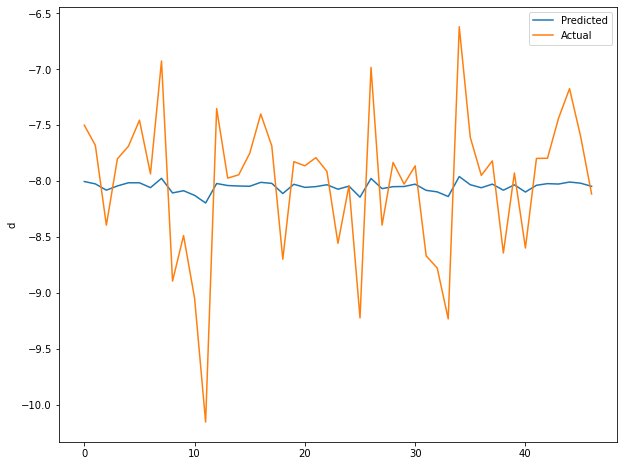

In [16]:
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.ylabel("d")
    plt.legend()
    plt.show()

In [17]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -7.76285315,
        -7.69810993, -7.63403014],
       [ 0.        ,  0.        ,  0.        , ..., -7.98274537,
        -7.90641297, -7.83006862],
       [ 0.        ,  0.        ,  0.        , ..., -9.58580052,
        -9.53318526, -9.46016782],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -8.31231572,
        -8.06515724, -7.81484725],
       [ 0.        ,  0.        ,  0.        , ..., -7.60271538,
        -7.45162244, -7.30815853],
       [ 0.        ,  0.        ,  0.        , ..., -9.57684305,
        -9.37414369, -9.15295634]])

In [15]:
from sklearn.neural_network import MLPRegressor

print("MLP Regression")
mlp_reg = MLPRegressor(activation='relu', hidden_layer_sizes={12, 12, 12}, solver='lbfgs', verbose = True, max_iter= 20000)
mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score : ", r_score)
score = mlp_reg.score(X_train, y_train)
print("Training Score : ", score)

MLP Regression
Testing Score :  0.9904720099130339
Training Score :  0.9999294548031166


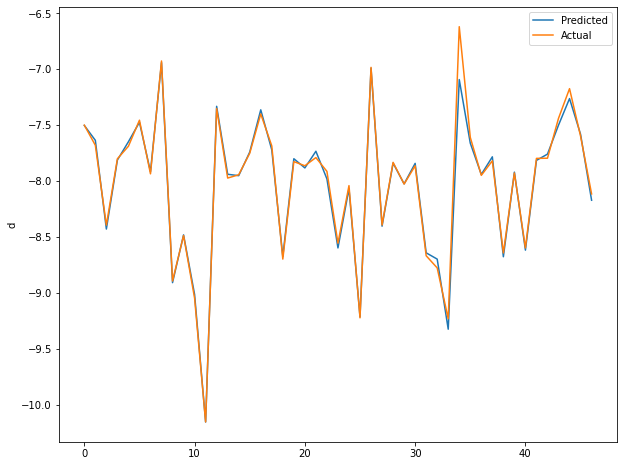

In [19]:
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.ylabel("d")
    plt.legend()
    plt.show()

In [16]:
from sklearn.linear_model import SGDRegressor
print("SGD Regression")
sgd_regression = SGDRegressor(max_iter=2000)
sgd_regression.fit(X_train, y_train)
y_pred = sgd_regression.predict(X_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score : ", r_score)
score = sgd_regression.score(X_train, y_train)
print("Training Score : ", score)

SGD Regression
Testing Score :  -2.2421676945372742e+27
Training Score :  -1.4469052293574722e+27
